<br>
# ** 5-4 Finance Analysis**
Technical Indicator | https://wikidocs.net/3396

<br>
### **01 Pandas_datareader**
> **from** &nbsp;&nbsp;  pandas_datareader &nbsp;&nbsp; **import** &nbsp;&nbsp; get_data_yahoo

In [1]:
# from pandas_datareader import get_data_yahoo
# price = get_data_yahoo('005930.KS','2017-06-01')
# price = price.fillna('ffill')
# price = price.dropna()
# price.tail(3)

In [2]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
price = pd.read_csv('./data/stock.csv')
price = price.set_index('Date')
price.head(3)
price.index = pd.DatetimeIndex(price.index)
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2017-06-01 to 2018-06-11
Data columns (total 6 columns):
High         248 non-null float64
Low          248 non-null float64
Open         248 non-null float64
Close        248 non-null float64
Volume       248 non-null float64
Adj Close    248 non-null float64
dtypes: float64(6)
memory usage: 13.6 KB


<br>
## **02 Stochastic Oscillator** 
주어진 기간중 당일종가가 상대적 위치를 판단하는 지표

In [3]:
def fnStoch(price, n=14):
    import pandas as pd
    date_num = len(price['Close'])
    tempSto_K = []
    for i in range(date_num):
        if i >= n -1:
            tempUp   = price['Close'][i] - min(price['Low'][i+1 -n : i+1])
            tempDown = max(price['High'][i+1 -n : i+1]) -  min(price['Low'][i+1 -n : i+1])
            tempSto_K.append( tempUp / tempDown )
        else:
            tempSto_K.append(0) 
    price['Sto_K']     = pd.Series(tempSto_K ,   index=price.index)
    price['Sto_D']     = pd.Series(price['Sto_K'].rolling(3).mean())
    price['Sto_SlowD'] = pd.Series(price['Sto_D'].rolling(3).mean())
    return price

In [4]:
price = fnStoch(price)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD
Date,,,,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0,0.384615,0.487179,0.509972
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0,0.141026,0.363248,0.465812
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0,0.205128,0.243590,0.364672


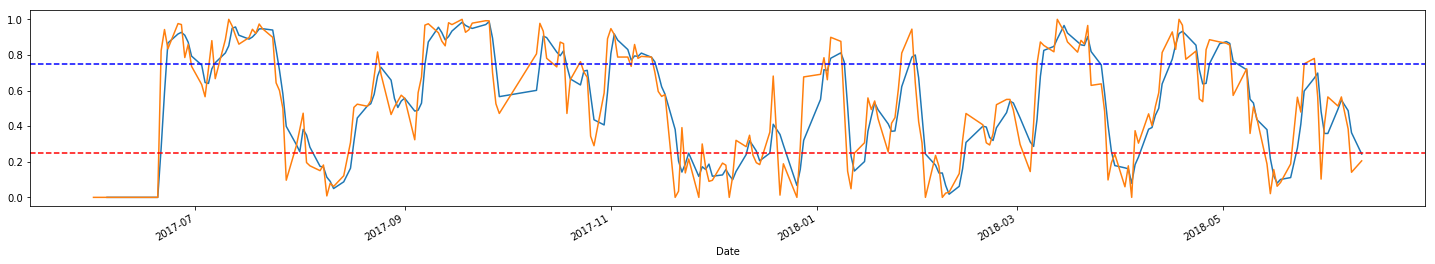

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))

price.Sto_D.plot()
price.Sto_K.plot()
plt.axhline(y = 0.25, linestyle = '--', color = 'red')
plt.axhline(y = 0.75, linestyle = '--', color = 'blue')

<br>
## **3 RSI(Relative Strength Index; 상대강도지수)** 
일정기간 가격상승압력과 하락압력간의 상대적인 강도를 판단한다

In [6]:
# np.diff()
import pandas as pd
data = [i   for i in range(100)]
data = pd.Series(data)
data[:10]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [7]:
data.diff(4)[:10]

0    NaN
1    NaN
2    NaN
3    NaN
4    4.0
5    4.0
6    4.0
7    4.0
8    4.0
9    4.0
dtype: float64

In [8]:
def fnRSI(price, m_N):    
    import numpy as np
    import pandas as pd

    m_Df = price.Close
    U = np.where(m_Df.diff(1) > 0, m_Df.diff(1), 0)
    D = np.where(m_Df.diff(1) < 0, m_Df.diff(1) *(-1), 0)

    AU = pd.Series(U).rolling( window=m_N).mean()
    AD = pd.Series(D).rolling( window=m_N).mean()
    RSI = AU.div(AD + AU) * 100
    RSI.index = price.index
    price['RSI'] = RSI.fillna(0)
    return price

In [9]:
price = fnRSI(price, 3)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD,RSI
Date,,,,,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0,0.384615,0.487179,0.509972,18.181818
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0,0.141026,0.363248,0.465812,10.810811
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0,0.205128,0.243590,0.364672,13.157895


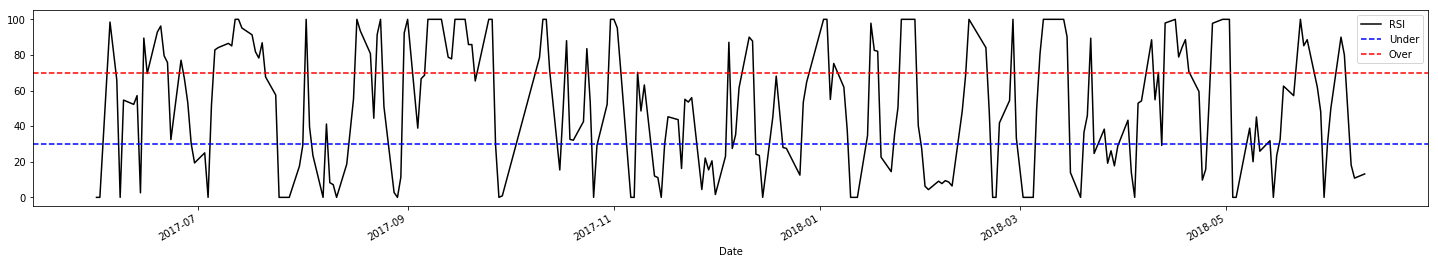

In [10]:
price['RSI'].plot(figsize=(25,4), label='RSI', color='black')
plt.axhline(y = 30, linestyle = '--', color = 'blue', label = 'Under')
plt.axhline(y = 70, linestyle = '--', color = 'red',  label = 'Over') 
plt.legend()

<br>
## **4 볼린저 밴드 데이터 그리기**
Bollinger Bands 

In [11]:
def fnBolingerBand(price, n=20, k=2):
    price['20d_ma']    = price['Close'].rolling(n).mean()
    price['Bol_upper'] = price['Close'].rolling(n).mean() + \
                         k * price['Close'].rolling(n, min_periods=n).std()
    price['Bol_lower'] = price['Close'].rolling(n).mean() - \
                         k * price['Close'].rolling(n, min_periods=n).std()
    return price

In [12]:
price = fnBolingerBand(price)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD,RSI,20d_ma,Bol_upper,Bol_lower
Date,,,,,,,,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0,0.384615,0.487179,0.509972,18.181818,50792.5,52789.412090,48795.587910
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0,0.141026,0.363248,0.465812,10.810811,50730.0,52789.994890,48670.005110
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0,0.205128,0.243590,0.364672,13.157895,50645.0,52694.107636,48595.892364


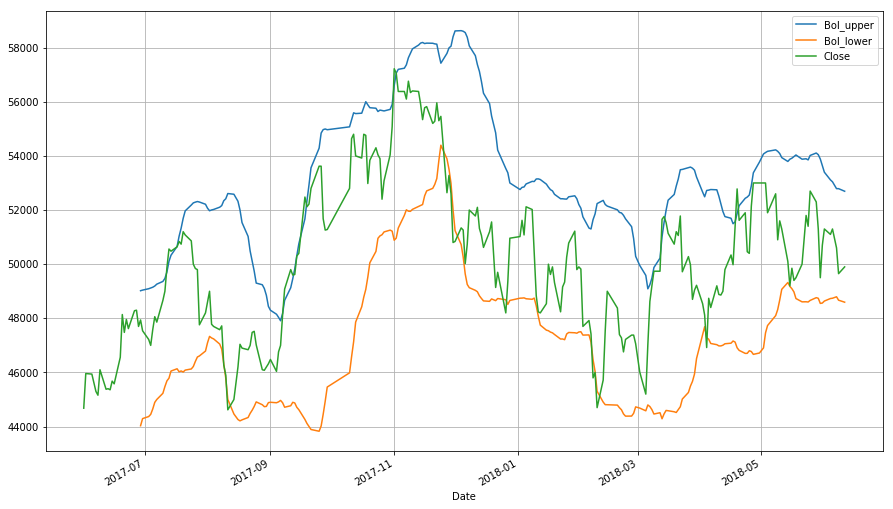

In [13]:
plt.figure(figsize=(15,9))
price.Bol_upper.plot()
price.Bol_lower.plot()
price.Close.plot()
plt.legend()
plt.grid()
plt.show()

<br>
## **5 MACD(moving average convergence/divergence)** 
np.ewm()

In [14]:
def fnMACD(price, m_NumFast=12, m_NumSlow=26, m_NumSignal=9):
    price['EMAFast']    = price['Close'].rolling(m_NumFast).mean()
    price['EMASlow']    = price['Close'].rolling(m_NumSlow).mean()
    price['MACD']       = price['EMAFast'] - price['EMASlow']
    price['MACDSignal'] = price['MACD'].ewm( span = m_NumSignal, min_periods = m_NumSignal-1).mean()
    price['MACDDiff']   = price['MACD'] - price['MACDSignal']
    return price

In [15]:
price = fnMACD(price)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD,RSI,20d_ma,Bol_upper,Bol_lower,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
Date,,,,,,,,,,,,,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0,0.384615,0.487179,0.509972,18.181818,50792.5,52789.412090,48795.587910,51166.666667,51244.230769,-77.564103,-312.104566,234.540463
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0,0.141026,0.363248,0.465812,10.810811,50730.0,52789.994890,48670.005110,51137.500000,51115.384615,22.115385,-245.260576,267.375960
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0,0.205128,0.243590,0.364672,13.157895,50645.0,52694.107636,48595.892364,50979.166667,50996.153846,-16.987179,-199.605897,182.618717


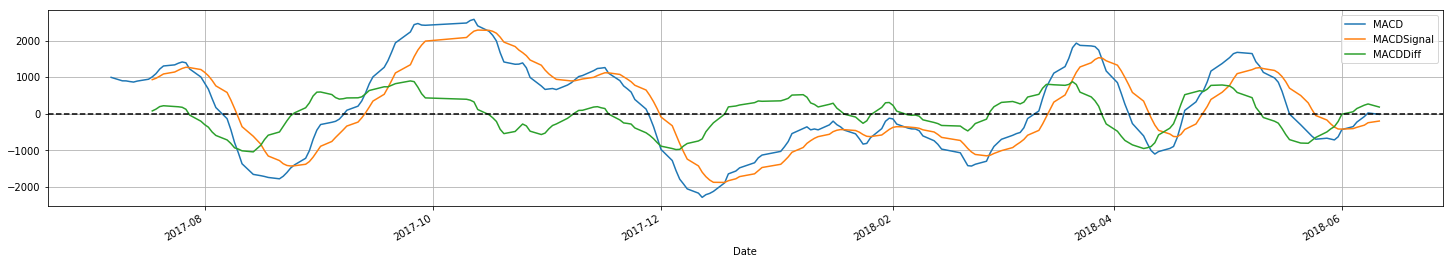

In [16]:
%matplotlib inline
plt.figure(figsize=(25,4))
price.MACD.plot()
price.MACDSignal.plot()
price.MACDDiff.plot()
plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.legend()
plt.grid()
plt.show()